# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.88'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,L87-1-101-reg2-FIA-r1,103.785325,0.010444,1284.515590,0.009991,273.793109,1284.515590,734.360415,0.960012,3.878183,...,1.140449,1.200549,0.269666,0.007013,1.078571,1.104530,0.111680,0.002488,PseudoVoigtModel,PseudoVoigtModel
1,L87-1-101-reg2-FIA-r2,103.774216,0.008526,1284.540397,0.008163,434.277647,1284.540397,1137.385957,0.951451,5.191029,...,1.149140,1.245442,0.283798,0.004382,1.097990,1.122711,0.131355,0.001493,PseudoVoigtModel,PseudoVoigtModel
2,L87-1-101-reg2-FIA-r3,103.788511,0.005693,1284.520725,0.005116,554.506323,1284.520775,1448.447774,0.952352,3.505115,...,1.085028,1.151678,0.161953,0.003435,1.089157,1.101754,0.126009,0.001265,PseudoVoigtModel,PseudoVoigtModel
3,L87-1-101-reg2-FIB-r1,103.879465,0.011649,1284.261720,0.010702,261.512386,1284.261720,770.284171,1.052783,3.399991,...,1.179756,1.249066,0.378487,0.008051,1.047619,1.032051,0.071686,0.002731,PseudoVoigtModel,PseudoVoigtModel
4,L87-1-101-reg2-FIB-r2,103.908291,0.006394,1284.234292,0.005627,548.451713,1284.234342,1556.222592,1.049812,3.765897,...,1.177391,1.188442,0.372455,0.003828,1.013216,1.050162,0.020070,0.001312,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'FG', 'Cap','window'],
 sort=True)
diad_meta[0]

'01 L87-1-101-reg2-FIA.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 43/43 [00:00<00:00, 132.65it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,L87-1-101-reg2-FIA-r1.txt,"January 4, 2024\n",January,4.0,6.025,60.0,5.0,50.0,"['0h', '5m', '2s']",2:52:37 PM\n,53557.0,1325.004
1,L87-1-101-reg2-FIA-r2.txt,"January 4, 2024\n",January,4.0,6.025,60.0,5.0,50.0,"['0h', '5m', '1s']",2:57:48 PM\n,53868.0,1325.004
2,L87-1-101-reg2-FIA-r3.txt,"January 4, 2024\n",January,4.0,6.027,60.0,5.0,50.0,"['0h', '5m', '1s']",3:03:32 PM\n,54212.0,1325.004
3,L87-1-101-reg2-FIB-r1.txt,"January 4, 2024\n",January,4.0,6.039,60.0,5.0,50.0,"['0h', '5m', '2s']",3:18:23 PM\n,55103.0,1325.004
4,L87-1-101-reg2-FIB-r2.txt,"January 4, 2024\n",January,4.0,6.033,60.0,5.0,50.0,"['0h', '5m', '1s']",3:23:35 PM\n,55415.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'L87-1-101-reg2-FIA-r1'

## Now get filename from spectra into same form as metadata

In [7]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
L87-1-101-reg2-FIA-r1


In [8]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,L87-1-101-reg2-FIA-r1,103.785325,0.010444,1284.515590,0.009991,273.793109,1284.515590,734.360415,0.960012,3.878183,...,January,4.0,6.025,60.0,5.0,50.0,"['0h', '5m', '2s']",2:52:37 PM\n,53557.0,1325.004
1,L87-1-101-reg2-FIA-r2,103.774216,0.008526,1284.540397,0.008163,434.277647,1284.540397,1137.385957,0.951451,5.191029,...,January,4.0,6.025,60.0,5.0,50.0,"['0h', '5m', '1s']",2:57:48 PM\n,53868.0,1325.004
2,L87-1-101-reg2-FIA-r3,103.788511,0.005693,1284.520725,0.005116,554.506323,1284.520775,1448.447774,0.952352,3.505115,...,January,4.0,6.027,60.0,5.0,50.0,"['0h', '5m', '1s']",3:03:32 PM\n,54212.0,1325.004
3,L87-1-101-reg2-FIB-r1,103.879465,0.011649,1284.261720,0.010702,261.512386,1284.261720,770.284171,1.052783,3.399991,...,January,4.0,6.039,60.0,5.0,50.0,"['0h', '5m', '2s']",3:18:23 PM\n,55103.0,1325.004
4,L87-1-101-reg2-FIB-r2,103.908291,0.006394,1284.234292,0.005627,548.451713,1284.234342,1556.222592,1.049812,3.765897,...,January,4.0,6.033,60.0,5.0,50.0,"['0h', '5m', '1s']",3:23:35 PM\n,55415.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [9]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [10]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [11]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

4.114708682556589e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,L87-1-101-reg2-FIA-r1,0.330732,0.005060,0.004481,0.002350,103.555367,0.010431,0.000447,0.010444,6.025,...,53557.0,NaN,NaN,NaN,NaN,NaN,53557.0,0.997784,0.997780,0.997789
1,L87-1-101-reg2-FIA-r2,0.325876,0.004343,0.003653,0.002350,103.544054,0.008519,0.000443,0.008526,6.025,...,53868.0,NaN,NaN,NaN,NaN,NaN,53868.0,0.997782,0.997778,0.997786
2,L87-1-101-reg2-FIA-r3,0.331894,0.003394,0.002449,0.002350,103.558070,0.005698,0.000439,0.005693,6.027,...,54212.0,NaN,NaN,NaN,NaN,NaN,54212.0,0.997780,0.997775,0.997784
3,L87-1-101-reg2-FIB-r1,0.370958,0.005599,0.005083,0.002348,103.648210,0.011631,0.000430,0.011649,6.039,...,55103.0,NaN,NaN,NaN,NaN,NaN,55103.0,0.997774,0.997770,0.997778
4,L87-1-101-reg2-FIB-r2,0.383473,0.003662,0.002809,0.002348,103.676769,0.006394,0.000427,0.006394,6.033,...,55415.0,NaN,NaN,NaN,NaN,NaN,55415.0,0.997772,0.997768,0.997776


In [12]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

4.114708682556589e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,L87-1-101-reg2-FIA-r1,0.330732,0.005060,0.004481,0.002350,103.555367,0.010431,0.000447,0.010444,6.025,...,53557.0,NaN,NaN,NaN,NaN,NaN,53557.0,0.997784,0.997780,0.997789
1,L87-1-101-reg2-FIA-r2,0.325876,0.004343,0.003653,0.002350,103.544054,0.008519,0.000443,0.008526,6.025,...,53868.0,NaN,NaN,NaN,NaN,NaN,53868.0,0.997782,0.997778,0.997786
2,L87-1-101-reg2-FIA-r3,0.331894,0.003394,0.002449,0.002350,103.558070,0.005698,0.000439,0.005693,6.027,...,54212.0,NaN,NaN,NaN,NaN,NaN,54212.0,0.997780,0.997775,0.997784
3,L87-1-101-reg2-FIB-r1,0.370958,0.005599,0.005083,0.002348,103.648210,0.011631,0.000430,0.011649,6.039,...,55103.0,NaN,NaN,NaN,NaN,NaN,55103.0,0.997774,0.997770,0.997778
4,L87-1-101-reg2-FIB-r2,0.383473,0.003662,0.002809,0.002348,103.676769,0.006394,0.000427,0.006394,6.033,...,55415.0,NaN,NaN,NaN,NaN,NaN,55415.0,0.997772,0.997768,0.997776


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [13]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_January 4, 2024_fitted_2024-04-29.xlsx


## This helps visualize the errors on each spectra 

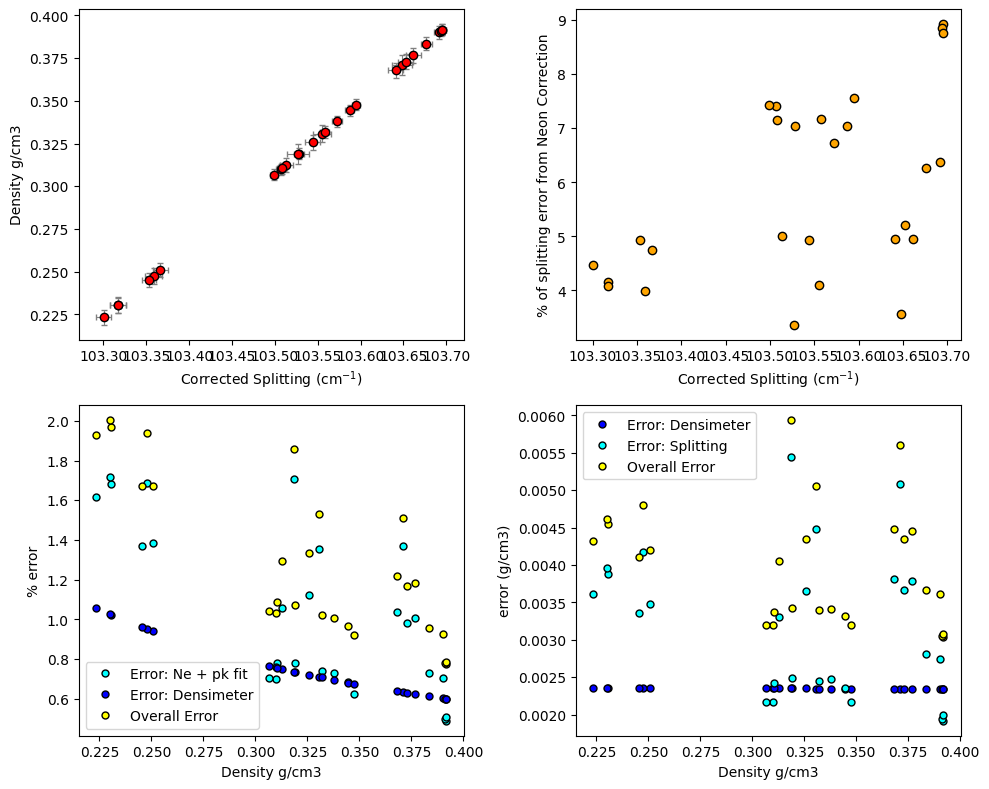

In [14]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

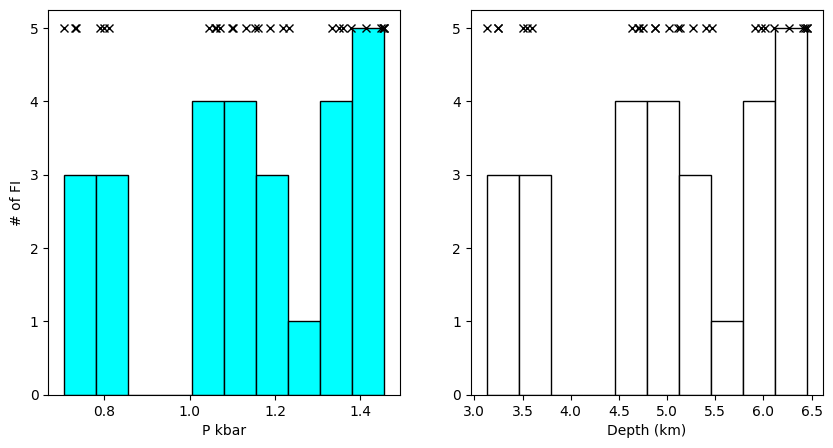

In [15]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')